In [1]:
import pandas as pd
import numpy as np
from datetime import datetime  # To access datetime 
from pandas import Series     # To work on series
import warnings             
import matplotlib.pyplot as plt

In [2]:
#To ignore the warnings warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore")

In [3]:
train = pd.read_csv('jetrail_train.csv')
test = pd.read_csv('jetrail_test.csv')

In [4]:
train_original=train.copy() 
test_original=test.copy()

In [5]:
train.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [6]:
train.tail()

,ID,Datetime,Count
18283,18283,25-09-2014 19:00,868
18284,18284,25-09-2014 20:00,732
18285,18285,25-09-2014 21:00,702
18286,18286,25-09-2014 22:00,580
18287,18287,25-09-2014 23:00,534


# Extracting features

In [7]:
train.columns , test.columns

(Index(['ID', 'Datetime', 'Count'], dtype='object'),
 Index(['ID', 'Datetime'], dtype='object'))

In [8]:
train.dtypes , test.dtypes

(ID           int64
 Datetime    object
 Count        int64
 dtype: object, ID           int64
 Datetime    object
 dtype: object)

In [9]:
train.shape

(18288, 3)

In [10]:
test.shape

(5112, 2)

In [11]:
#data type of Datetime is object. So first of all we have to change the data type to datetime format 
#otherwise we cannot extract features from it.
train['Datetime'] = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M') 
test['Datetime'] = pd.to_datetime(test.Datetime,format = '%d-%m-%Y %H:%M')
test_original['Datetime'] = pd.to_datetime(test_original.Datetime,format='%d-%m-%Y %H:%M') 
train_original['Datetime'] = pd.to_datetime(train_original.Datetime,format='%d-%m-%Y %H:%M')

In [12]:
#let’s extract the year, month, day and hour from the Datetime to validate our hypothesis.
for i in (train,test):
    i['year'] = i.Datetime.dt.year
    i['month'] = i.Datetime.dt.month
    i['day'] = i.Datetime.dt.day
    i['hour'] = i.Datetime.dt.hour

In [50]:
for i in (train_original,test_original):
    i['year'] = i.Datetime.dt.year
    i['month'] = i.Datetime.dt.month
    i['day'] = i.Datetime.dt.day
    i['hour'] = i.Datetime.dt.hour

In [13]:
train['day of week']=train['Datetime'].dt.dayofweek 
temp = train['Datetime']

In [14]:
def dayofweek(a):
    if a.dayofweek == 5 or a.dayofweek ==6 :
        return 1
    else:
        return 0

In [15]:
temp2 = train['Datetime'].apply(dayofweek)
train['weekend'] = temp2

In [16]:
train.head()

,ID,Datetime,Count,year,month,day,hour,day of week,weekend
0,0,2012-08-25 00:00:00,8,2012,8,25,0,5,1
1,1,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2,2,2012-08-25 02:00:00,6,2012,8,25,2,5,1
3,3,2012-08-25 03:00:00,2,2012,8,25,3,5,1
4,4,2012-08-25 04:00:00,2,2012,8,25,4,5,1


In [51]:
train_original.head()

,ID,Datetime,Count,year,month,day,hour
0,0,2012-08-25 00:00:00,8,2012,8,25,0
1,1,2012-08-25 01:00:00,2,2012,8,25,1
2,2,2012-08-25 02:00:00,6,2012,8,25,2
3,3,2012-08-25 03:00:00,2,2012,8,25,3
4,4,2012-08-25 04:00:00,2,2012,8,25,4


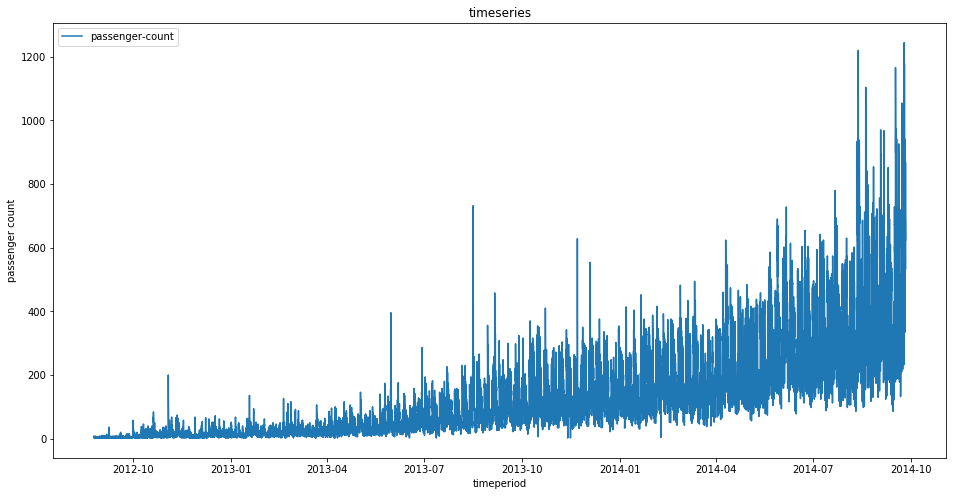

In [17]:
train.index = train['Datetime']
df = train.drop('ID',1)
ts = df['Count']
plt.figure(figsize=(16,8))
plt.plot(ts,label='passenger-count')
plt.title('timeseries')
plt.xlabel('timeperiod')
plt.ylabel('passenger count')
plt.legend(loc = 'best')

Here we can infer that there is an increasing trend in the series, i.e., the number of count is increasing with respect to time. We can also see that at certain points there is a sudden increase in the number of counts. The possible reason behind this could be that on particular day, due to some event the traffic was high.

Hypothesis testing:
1)Traffic will increase as the years pass by
2)Traffic will be high from May to October
3)Traffic on weekdays will be more
4)Traffic during the peak hours will be high

# Exploratory Analysis

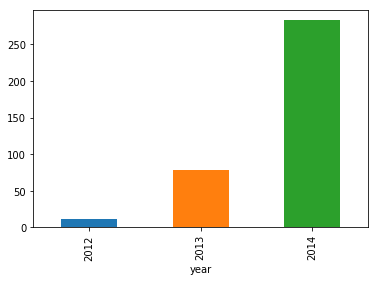

In [18]:
#Our first hypothesis was traffic will increase as the years pass by. So let’s look at yearly passenger count.
train.groupby('year')['Count'].mean().plot.bar()

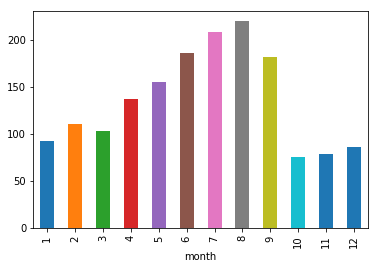

In [19]:
#Our second hypothesis was about increase in traffic from May to October. So, let’s see the relation between count and month.
train.groupby('month')['Count'].mean().plot.bar()

* from may it inc til aug but last three month it decreases

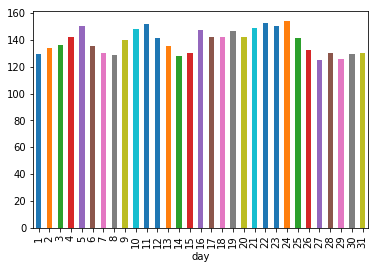

In [20]:
#traffic on weekdays will be more
train.groupby('day')['Count'].mean().plot.bar()

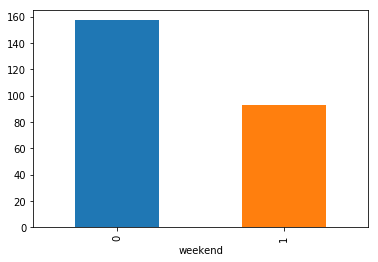

In [21]:
train.groupby('weekend')['Count'].mean().plot.bar()

It can be inferred from the above plot that the traffic is more on weekdays as compared to weekends which validates our hypothesis.

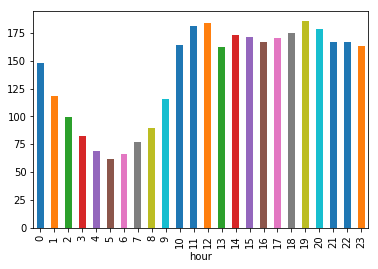

In [22]:
#traffic will be more during peak hours
train.groupby('hour')['Count'].mean().plot.bar()

* we can see that traffic is more during 7 pm which is the peak time as most of the passengers would be travelling back home from their office or college ,also the time between 11am and 12 pm shows a peak.
* traffic is least at 5am

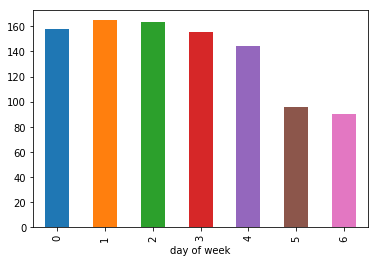

In [23]:
#daywise passenger count
train.groupby('day of week')['Count'].mean().plot.bar()

passengers travel more during weekdays...0-mon and 6-sun

In [24]:
train = train.drop('ID',1)

In [25]:
train.Timestamp = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M') 
train.index = train.Timestamp 
# Hourly time series 
hourly = train.resample('H').mean() 
# Converting to daily mean 
daily = train.resample('D').mean() 
# Converting to weekly mean 
weekly = train.resample('W').mean() 
# Converting to monthly mean 
monthly = train.resample('M').mean()

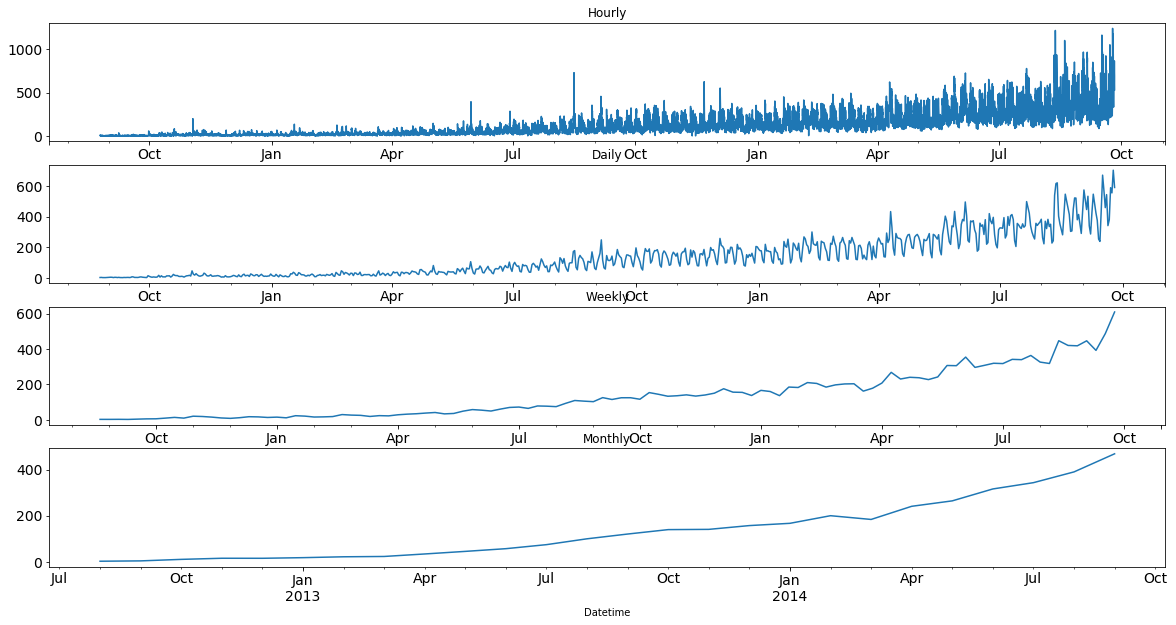

In [26]:
fig, axs = plt.subplots(4,1) 
hourly.Count.plot(figsize=(20,10), title= 'Hourly', fontsize=14, ax=axs[0]) 
daily.Count.plot(figsize=(20,10), title= 'Daily', fontsize=14, ax=axs[1]) 
weekly.Count.plot(figsize=(20,10), title= 'Weekly', fontsize=14, ax=axs[2]) 
monthly.Count.plot(figsize=(20,10), title= 'Monthly', fontsize=14, ax=axs[3]) 

plt.show()


We can see that the time series is becoming more and more stable when we are aggregating it on daily, weekly and monthly basis.

But it would be difficult to convert the monthly and weekly predictions to hourly predictions, as first we have to convert the monthly predictions to weekly, weekly to daily and daily to hourly predictions, which will become very expanded process. So, we will work on the daily time series.

In [27]:
test.Timestamp = pd.to_datetime(test.Datetime,format='%d-%m-%Y %H:%M') 
test.index = test.Timestamp  

# Converting to daily mean 
test = test.resample('D').mean() 

train.Timestamp = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M')
train.index = train.Timestamp 
# Converting to daily mean 
train = train.resample('D').mean()

# Splitting the data into training and validation part

In [28]:
Train=train.ix['2012-08-25':'2014-06-24'] 
valid=train.ix['2014-06-25':'2014-09-25']  #for validation im considering only last three months

 Pandas provides a hybrid method for selections and subsetting the object using the ix[] operator. ix[] is the most general indexer and will support any of the inputs in loc[] and iloc[].

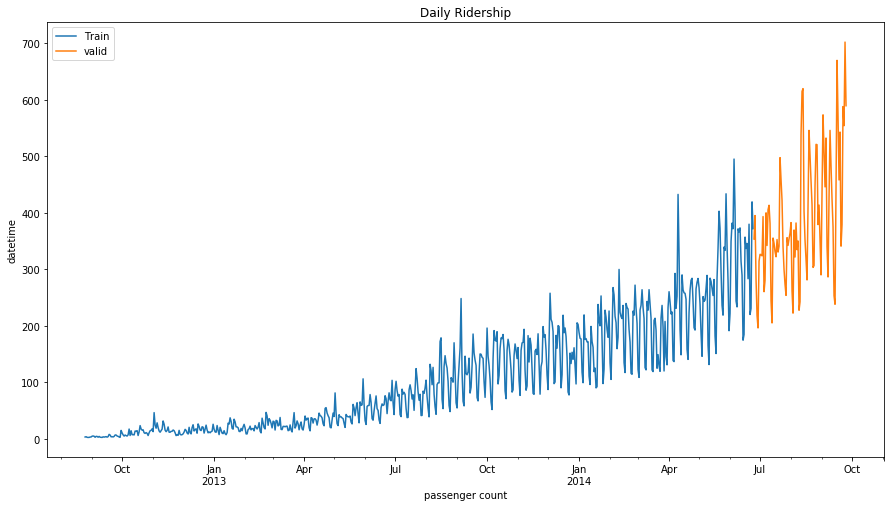

In [29]:
Train.Count.plot(figsize=(15,8),title='Daily Ridership',fontsize=10,label='Train')
valid.Count.plot(figsize=(15,8),title='Daily Ridership',fontsize=10,label='valid')
plt.xlabel('passenger count')
plt.ylabel('datetime')
plt.legend(loc='best')

Here the blue part represents the train data and the orange part represents the validation data.
We will predict the traffic for the validation part and then visualize how accurate our predictions are. Finally we will make predictions for the test dataset.

### We will look at various models now to forecast the time series . Methods for forecasting are:

i) Naive Approach
ii) Moving Average
iii) Simple Exponential Smoothing
iv) Holt’s Linear Trend Model

### 1)Naive Approach:
In this forecasting technique, we assume that the next expected point is equal to the last observed point. So we can expect a straight horizontal line as the prediction

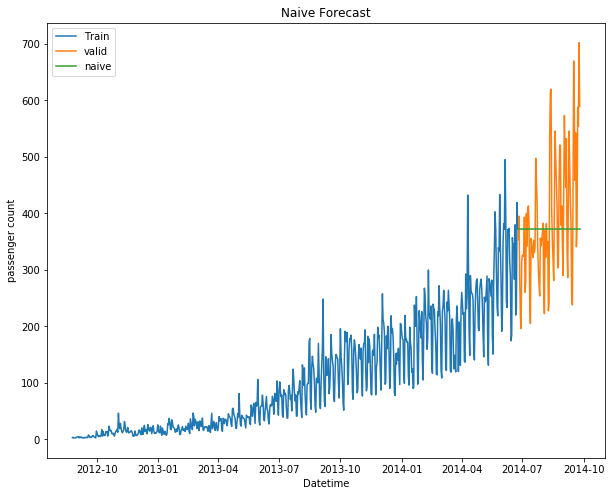

In [30]:
arr = np.asarray(Train.Count)
y_pred = valid
y_pred['naive'] = arr[len(arr)-1]   #assigning the last obs to y_pred['naive']
plt.figure(figsize=(10,8))
plt.plot(Train.index,Train['Count'],label='Train')
plt.plot(valid.index,valid['Count'],label='valid')
plt.plot(y_pred.index,y_pred['naive'],label='naive')
plt.xlabel('Datetime')
plt.ylabel('passenger count')
plt.title('Naive Forecast')
plt.legend(loc='best')
plt.show()

We can calculate how accurate our predictions are using rmse(Root Mean Square Error).
rmse is the standard deviation of the residuals.
Residuals are a measure of how far from the regression line data points are

In [31]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(valid.Count,y_pred.naive))
print('RMSE of Naive method = ',rmse)

RMSE of Naive method =  111.79050467496724


We can infer that this method is not suitable for datasets with high variability. We can reduce the rmse value by adopting different techniques.

### Moving Average
In this technique we will take the average of the passenger counts for last few days only.

In [32]:
y_pred1 = valid
y_pred1['mov_avg'] = Train['Count'].rolling(10).mean().iloc[-1]
y_pred1.head()

,Count,year,month,day,hour,day of week,weekend,naive,mov_avg
Datetime,,,,,,,,,
2014-06-25,353.666667,2014.0,6.0,25.0,11.5,2.0,0.0,372.166667,313.033333
2014-06-26,395.250000,2014.0,6.0,26.0,11.5,3.0,0.0,372.166667,313.033333
2014-06-27,282.333333,2014.0,6.0,27.0,11.5,4.0,0.0,372.166667,313.033333
2014-06-28,218.250000,2014.0,6.0,28.0,11.5,5.0,1.0,372.166667,313.033333
2014-06-29,196.250000,2014.0,6.0,29.0,11.5,6.0,1.0,372.166667,313.033333


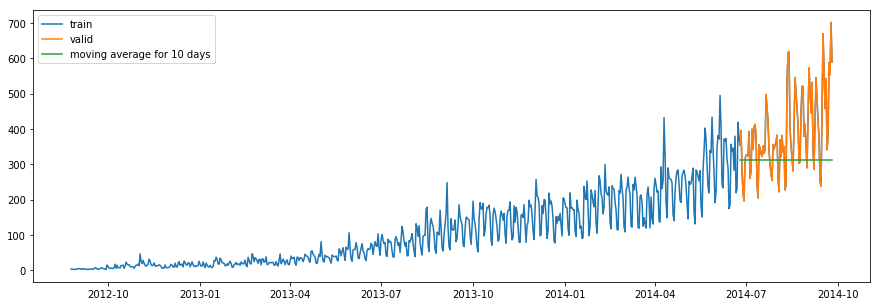

In [33]:
#for 10 days
plt.figure(figsize=(15,5))
plt.plot(train['Count'],label='train')
plt.plot(valid['Count'],label='valid')
plt.plot(y_pred1['mov_avg'],label='moving average for 10 days')
plt.legend(loc='best')
plt.show()

In [34]:
#for 20 days
y_pred1['mov_avg']=Train['Count'].rolling(20).mean().iloc[-1]
y_pred1.head()

,Count,year,month,day,hour,day of week,weekend,naive,mov_avg
Datetime,,,,,,,,,
2014-06-25,353.666667,2014.0,6.0,25.0,11.5,2.0,0.0,372.166667,319.916667
2014-06-26,395.250000,2014.0,6.0,26.0,11.5,3.0,0.0,372.166667,319.916667
2014-06-27,282.333333,2014.0,6.0,27.0,11.5,4.0,0.0,372.166667,319.916667
2014-06-28,218.250000,2014.0,6.0,28.0,11.5,5.0,1.0,372.166667,319.916667
2014-06-29,196.250000,2014.0,6.0,29.0,11.5,6.0,1.0,372.166667,319.916667


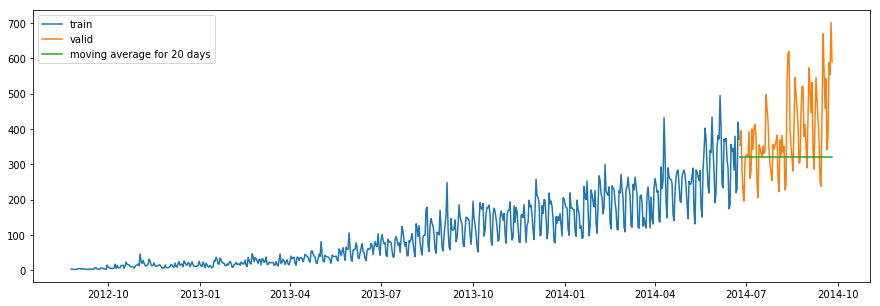

In [35]:
plt.figure(figsize=(15,5))
plt.plot(Train['Count'],label='train')
plt.plot(valid['Count'],label='valid')
plt.plot(y_pred1['mov_avg'],label='moving average for 20 days')
plt.legend(loc='best')
plt.show()

In [36]:
#for 50 days
y_pred1['mov_avg']=Train['Count'].rolling(50).mean().iloc[-1]
y_pred1.head()

,Count,year,month,day,hour,day of week,weekend,naive,mov_avg
Datetime,,,,,,,,,
2014-06-25,353.666667,2014.0,6.0,25.0,11.5,2.0,0.0,372.166667,296.626667
2014-06-26,395.250000,2014.0,6.0,26.0,11.5,3.0,0.0,372.166667,296.626667
2014-06-27,282.333333,2014.0,6.0,27.0,11.5,4.0,0.0,372.166667,296.626667
2014-06-28,218.250000,2014.0,6.0,28.0,11.5,5.0,1.0,372.166667,296.626667
2014-06-29,196.250000,2014.0,6.0,29.0,11.5,6.0,1.0,372.166667,296.626667


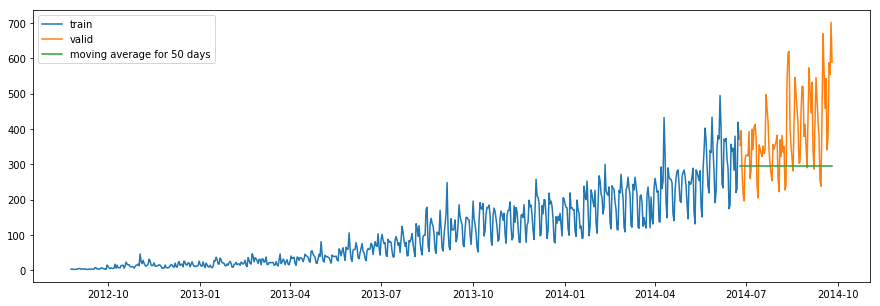

In [37]:
plt.figure(figsize=(15,5))
plt.plot(Train['Count'],label='train')
plt.plot(valid['Count'],label='valid')
plt.plot(y_pred1['mov_avg'],label='moving average for 50 days')
plt.legend(loc='best')
plt.show()

In [38]:
rmse = np.sqrt(mean_squared_error(valid.Count,y_pred1.mov_avg))
print('RMSE IS ',rmse)

RMSE IS  144.19175679986802


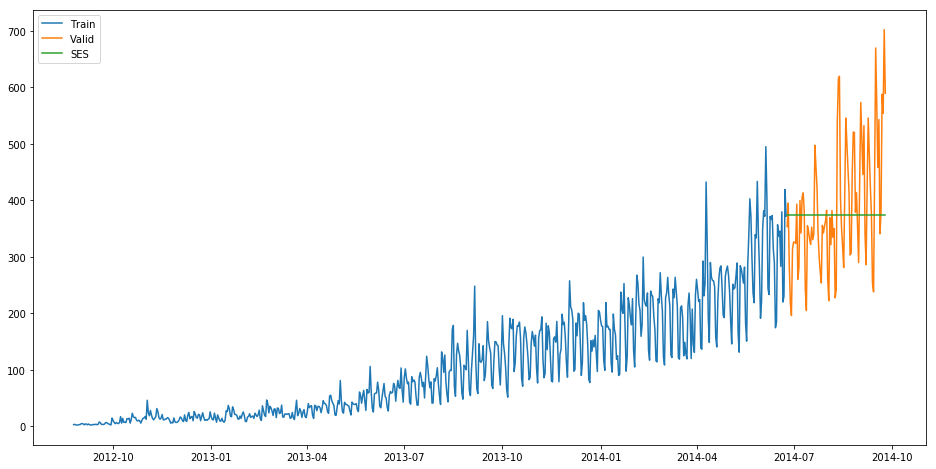

In [39]:
from statsmodels.tsa.api import ExponentialSmoothing,SimpleExpSmoothing,Holt
y_pred = valid
fit = SimpleExpSmoothing(np.asarray(Train['Count'])).fit(smoothing_level=0.8,optimized=False)
y_pred['SES']=fit.forecast(len(valid))
plt.figure(figsize=(16,8)) 
plt.plot(Train['Count'], label='Train') 
plt.plot(valid['Count'], label='Valid') 
plt.plot(y_pred['SES'], label='SES') 
plt.legend(loc='best') 
plt.show()

In [40]:
rmse = np.sqrt(mean_squared_error(valid.Count,y_pred.SES))
rmse

111.49488572738103

fit of the model has improved. More the alpha value less the rmse value.

### Holt’s Linear Trend Model
It is an extension of simple exponential smoothing to allow forecasting of data with a trend.
This method takes into account the trend of the dataset. The forecast function in this method is a function of level and trend.
First of all let us visualize the trend, seasonality and error in the series.

We can decompose the time series in four parts.

Observed, which is the original time series.
Trend, which shows the trend in the time series, i.e., increasing or decreasing behaviour of the time series.
Seasonal, which tells us about the seasonality in the time series.
Residual, which is obtained by removing any trend or seasonality in the time series.

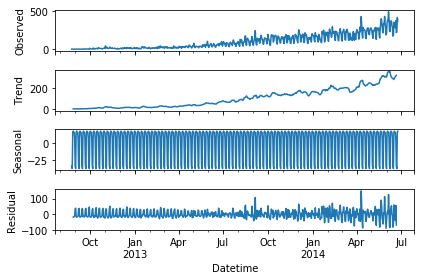

In [41]:
import statsmodels.api as sm
sm.tsa.seasonal_decompose(Train.Count).plot()
result=sm.tsa.stattools.adfuller(train.Count)
plt.show()

There is an increasing trend

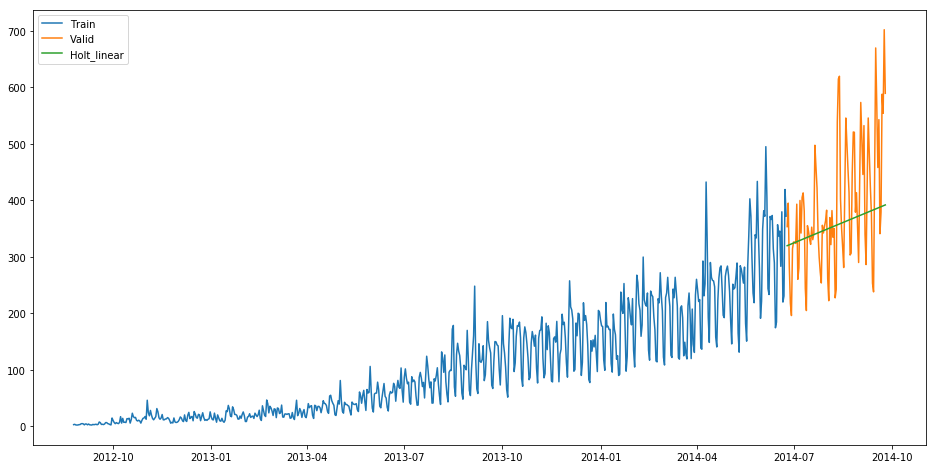

In [42]:
y_hat = valid 
fit1 = Holt(np.asarray(Train['Count'])).fit(smoothing_level = 0.2,smoothing_slope = 0.1)
y_hat['Holt_linear'] = fit1.forecast(len(valid)) 
plt.figure(figsize=(16,8)) 
plt.plot(Train['Count'], label='Train') 
plt.plot(valid['Count'], label='Valid') 
plt.plot(y_hat['Holt_linear'], label='Holt_linear') 
plt.legend(loc='best') 
plt.show()

In [43]:
rmse = np.sqrt(mean_squared_error(valid.Count,y_hat.Holt_linear))
rmse

106.56615097925345

It can be inferred that the rmse value has decreased.